In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

In [215]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

In [216]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [218]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [219]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

## temperature 결측값

In [220]:
train[train['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


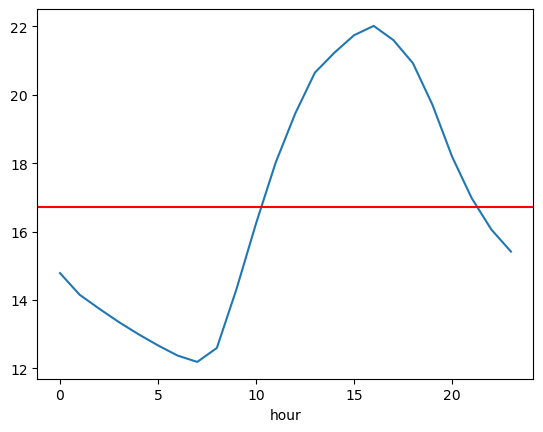

In [221]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean(), color = 'red')

- 위에 그래프를 보니 결측값을 전체 평균으로 대체한다면 모델링에 영향이 있겠다고 판단함

In [222]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

 - 아래와 같이 해준 이유는 시간대에 알맞은 평균을 넣어주기 위함이다
 - 만약 그렇지 않고 전체 시간 평균온도인 16도를 넣어준다면 0시나 18시 온도가 같다는 잘못된 데이터를 넣어준 것 과 같다

In [223]:
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True)

In [224]:
train['hour_bef_temperature'].isnull().sum()

0

## windspeed 결측값

In [225]:
train[train['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


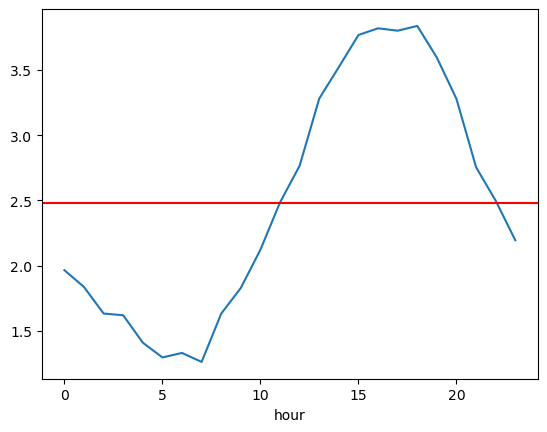

In [226]:
train.groupby('hour').mean()['hour_bef_windspeed'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_windspeed'].mean(), color = 'red')

- windspeed 마찬가지로 그래프를 보니 결측값을 전체 평균으로 대체한다면 모델링에 영향이 있을거 같다

In [227]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [228]:
train[train['hour_bef_windspeed'].isnull()].index # windespeed가 null인 인덱스를 불러와서 아래 코드에 복사 붙여놓기 해준다..

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [229]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace = True)

## precipitation 결측값

In [230]:
train[train['hour_bef_precipitation'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


- count 수를 보고 비가 왔는지 안왔는지 예측을 해보자

In [231]:
train[['count', 'hour_bef_precipitation']].sort_values(by='count').head(10)

,count,hour_bef_precipitation
666,1.0,0.0
1231,1.0,1.0
814,1.0,1.0
1035,1.0,NaN
1272,1.0,1.0
583,1.0,1.0
306,1.0,1.0
323,2.0,1.0
1109,2.0,1.0
436,2.0,1.0


In [232]:
cond1 = train['count'] >= 39
train[cond1].sort_values(by='count').head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
84,130,1,9.400000,0.0,2.500000,65.0,1907.0,NaN,NaN,NaN,39.0
708,1080,1,11.600000,0.0,0.600000,52.0,1853.0,NaN,NaN,NaN,39.0
713,1085,19,16.700000,1.0,0.700000,88.0,577.0,0.037,82.0,37.0,39.0
5,13,2,13.600000,0.0,1.700000,80.0,1073.0,0.027,34.0,15.0,39.0
671,1024,2,17.400000,0.0,1.300000,44.0,1319.0,0.023,68.0,41.0,39.0
8,19,9,13.800000,0.0,1.900000,64.0,1344.0,0.039,93.0,19.0,39.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
374,568,7,12.800000,0.0,1.400000,84.0,235.0,0.031,114.0,67.0,39.0
811,1232,1,19.300000,0.0,1.900000,78.0,715.0,NaN,NaN,NaN,39.0
976,1477,0,5.900000,0.0,2.000000,74.0,2000.0,0.042,25.0,25.0,40.0


In [233]:
train['hour_bef_precipitation'].fillna({934:0,1035:1}, inplace = True)

In [234]:
train['hour_bef_precipitation'].isnull().sum()

0

## humidity 결측값

In [235]:
train.groupby('hour').mean()['hour_bef_humidity'].describe()

count    24.000000
mean     52.201108
std      10.913220
min      36.450000
25%      41.723156
50%      52.786885
75%      62.073770
max      67.934426
Name: hour_bef_humidity, dtype: float64

In [236]:
train['hour_bef_humidity'].fillna(train.groupby('hour').mean()['hour_bef_humidity'].mean(), inplace = True)

In [237]:
train['hour_bef_humidity'].isnull().sum()

0

In [238]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

## ozone 결측치

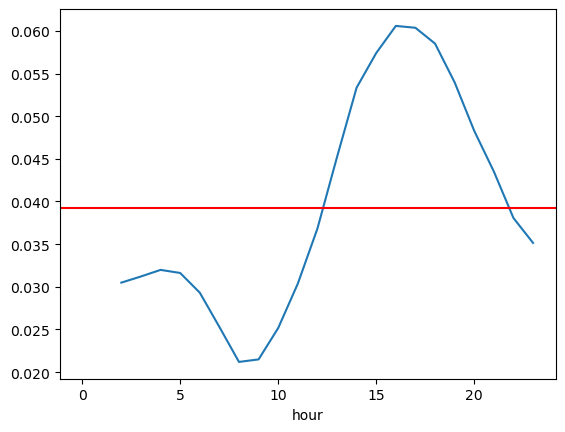

In [239]:
train.groupby('hour').mean()['hour_bef_ozone'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_ozone'].mean(), color = 'red')

In [240]:
train['hour_bef_ozone'].isnull().sum()

76

In [241]:
cond = train['hour'] == 1
fill_ozone = train.loc[cond]['hour_bef_ozone'].fillna(0.031984)

In [242]:
train['hour_bef_ozone'].fillna(fill_ozone, inplace = True)

In [243]:
train['hour_bef_ozone'].isnull().sum()

15

In [244]:
train.groupby('hour').mean()['hour_bef_ozone']

hour
0     0.033763
1     0.031984
2     0.030492
3     0.031213
4     0.031984
5     0.031623
6     0.029317
7     0.025300
8     0.021197
9     0.021492
10    0.025167
11    0.030367
12    0.036817
13    0.045203
14    0.053344
15    0.057400
16    0.060579
17    0.060362
18    0.058508
19    0.053967
20    0.048279
21    0.043517
22    0.038066
23    0.035148
Name: hour_bef_ozone, dtype: float64

In [245]:
train[train['hour_bef_ozone'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
44,76,17,21.700000,0.0,3.000000,35.000000,2000.0,NaN,32.0,19.0,213.0
122,181,16,26.200000,0.0,4.300000,31.000000,1718.0,NaN,47.0,23.0,136.0
140,206,10,18.200000,0.0,2.400000,60.000000,527.0,NaN,NaN,NaN,66.0
422,654,18,20.300000,0.0,4.100000,24.000000,2000.0,NaN,57.0,27.0,320.0
451,695,17,20.100000,0.0,4.500000,25.000000,2000.0,NaN,58.0,29.0,236.0
532,823,12,22.300000,0.0,2.800000,51.000000,575.0,NaN,NaN,NaN,121.0
537,829,7,18.700000,0.0,2.000000,69.000000,915.0,NaN,NaN,NaN,127.0
595,912,11,20.300000,0.0,2.600000,56.000000,576.0,NaN,NaN,NaN,95.0
631,967,15,26.300000,0.0,3.600000,30.000000,1805.0,NaN,50.0,22.0,131.0
645,987,6,18.700000,0.0,1.000000,72.000000,634.0,NaN,NaN,NaN,53.0


In [246]:
train['hour_bef_ozone'].fillna({44:0.060362, 122:0.060579, 140:0.025167, 422:0.058508, 451:0.060362, 532:0.036817, 537:0.025300, 595:0.030367, 631:0.057400, 645:0.029317, 868:0.060579, 897:0.045203, 934:0.033763,
            1035:0.053967, 1211:0.060579}, inplace = True)

In [247]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         2
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

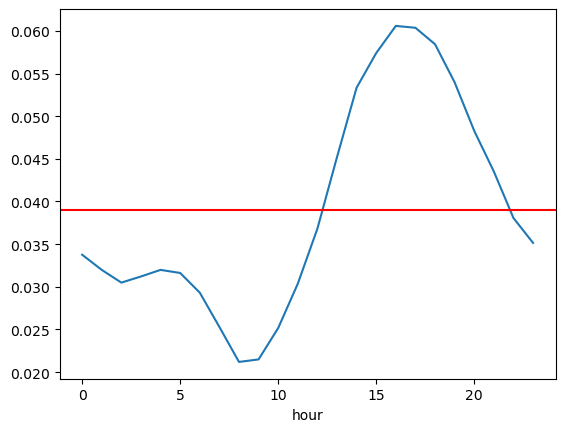

In [248]:
train.groupby('hour').mean()['hour_bef_ozone'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_ozone'].mean(), color = 'red')

In [249]:
train_df = train[['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone', 'count']]

In [250]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_ozone          1459 non-null   float64
 6   count                   1459 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 79.9 KB


## test 데이터도 같은 결측값 작업

In [251]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [252]:
test['hour_bef_temperature'].fillna({653:19.704918}, inplace = True)

test['hour_bef_windspeed'].fillna({653:3.595082}, inplace = True)

test['hour_bef_humidity'].fillna(train.groupby('hour').mean()['hour_bef_humidity'].mean(), inplace = True)

test['hour_bef_precipitation'].fillna(0, inplace = True)

test['hour_bef_ozone'].fillna({212:0.065138, 386:0.058893, 637:0.049276, 653:0.054207, 658:0.058893}, inplace = True)

In [253]:
test['hour_bef_ozone'].fillna(0.031984, inplace = True)

In [254]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        1
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [255]:
test_df = test[['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone']]

In [256]:
train_df.to_csv("train_one.csv", index = False)
test_df.to_csv("test_one.csv", index = False)

In [258]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    715 non-null    float64
 2   hour_bef_precipitation  715 non-null    float64
 3   hour_bef_windspeed      715 non-null    float64
 4   hour_bef_humidity       715 non-null    float64
 5   hour_bef_ozone          715 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.6 KB
